<a href="https://colab.research.google.com/github/LiaLiz2000/Machine-Learning/blob/main/T%C3%A9cnicas_de_Validaci%C3%B3n_Cruzada_Evaluaci%C3%B3n_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de clasificación utilizando un dataset sobre cáncer, aplicando tres tipos de
modelos de aprendizaje automático (Árboles de Decisión, Regresión Logística y K-Nearest Neighbors) con
validación cruzada.

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Árbol de Decisión con k=10: Exactitud promedio = 0.9350 | Desviación estándar = 0.0294
Regresión Logística con k=10: Exactitud promedio = 0.9718 | Desviación estándar = 0.0212
k-NN con k=10: Exactitud promedio = 0.9648 | Desviación estándar = 0.0263


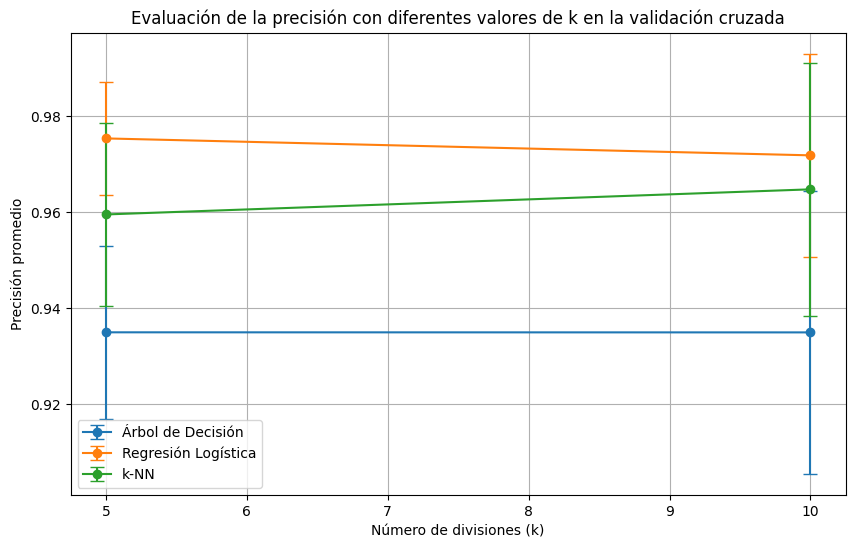


El mejor modelo es: Regresión Logística


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Cargar dataset
data = pd.read_csv("cancer_data.csv")
print(data.head(5))

# Características y variable objetivo
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reemplazo de nulos usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

# Modelos a evaluar
models = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Regresión Logística": LogisticRegression(random_state=42),
    "k-NN": KNeighborsClassifier()
}

# Evaluación de modelos con validación cruzada
k_values = [5, 10]
results = {model_name: {k: [] for k in k_values} for model_name in models}

for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    for model_name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
        results[model_name][k] = (np.mean(scores), np.std(scores))
        print(f"{model_name} con k={k}: Exactitud promedio = {np.mean(scores):.4f} | Desviación estándar = {np.std(scores):.4f}")

# Visualización de resultados
plt.figure(figsize=(10, 6))

for model_name, score_data in results.items():
    means = [score_data[k][0] for k in k_values]
    stds = [score_data[k][1] for k in k_values]
    plt.errorbar(k_values, means, yerr=stds, label=model_name, fmt='-o', capsize=5)

plt.xlabel('Número de divisiones (k)')
plt.ylabel('Precisión promedio')
plt.title('Evaluación de la precisión con diferentes valores de k en la validación cruzada')
plt.legend()
plt.grid(True)
plt.show()

# Comparo las precisiones promedio de los modelos
best_model_name = max(models, key=lambda model_name: np.mean([results[model_name][k][0] for k in k_values]))
print(f"\nEl mejor modelo es: {best_model_name}")